In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

In [ ]:
print("Missing values in X:")
display(X.isnull().sum())

print("\nMissing values in y:")
display(y.isnull().sum())

Missing values in X:


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0



Missing values in y:


,0
Cover_Type,0


In [ ]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
display(X.nunique())

,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


The variables include elevation, aspect, slope, distance to hydrology, hillshade at different times, distance to fire points, if it is a wilderness area, and the soil type. There are no missing values in the dataset. This is good because we can jump into EDA. All of the categorical variables are already one-hot encoded, which is good for prediction.

To start, we are going to use all the available variables. This will give us the most data to work with to predict the tree cover type.

In [ ]:
X.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


All variable datatypes are int64.

In [ ]:
X[X.columns[:10]].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Summary statistics for the first 10 columns (not the binary variables) are shown above.

In [ ]:
for column in X[X.columns[:10]]:
    print(X[column].values)

[2596 2590 2804 ... 2386 2384 2383]
[ 51  56 139 ... 159 170 165]
[ 3  2  9 ... 17 15 13]
[258 212 268 ...  60  60  60]
[ 0 -6 65 ...  7  5  4]
[ 510  390 3180 ...   90   90   67]
[221 220 234 ... 236 230 231]
[232 235 238 ... 241 245 244]
[148 151 135 ... 130 143 141]
[6279 6225 6121 ...  854  864  875]


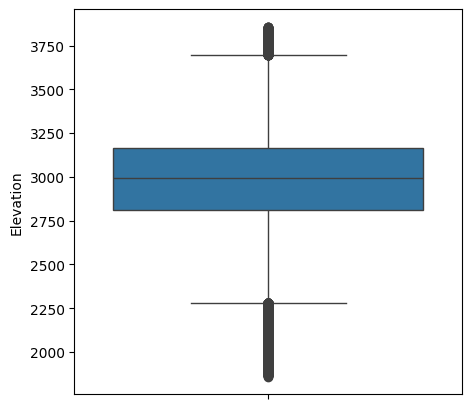

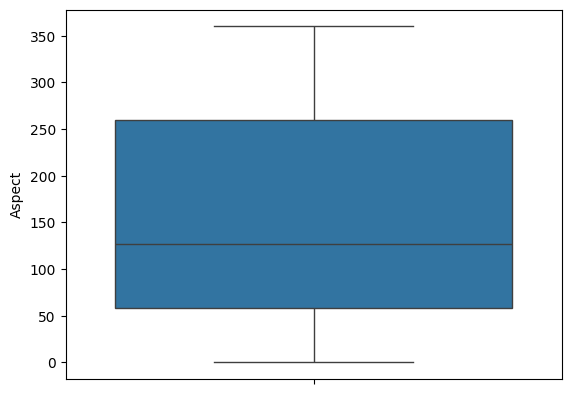

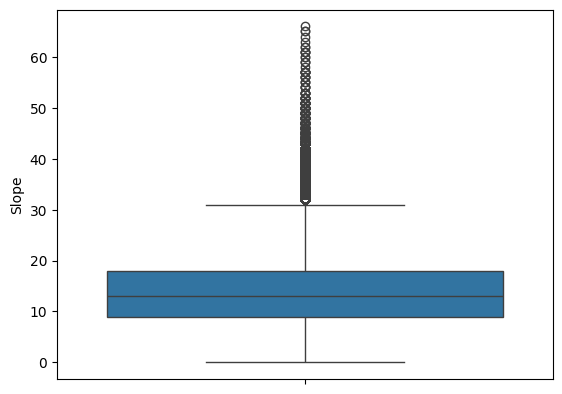

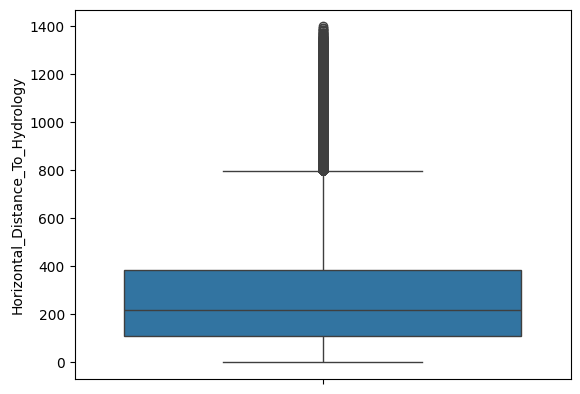

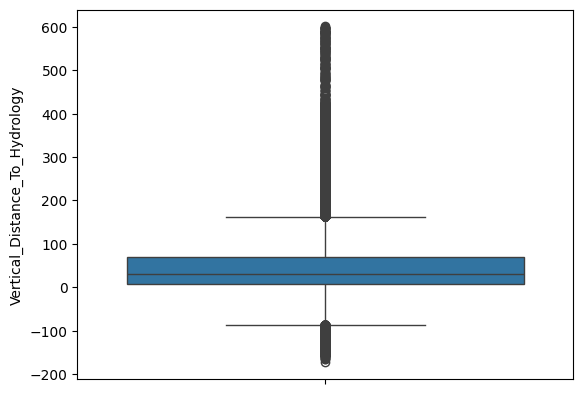

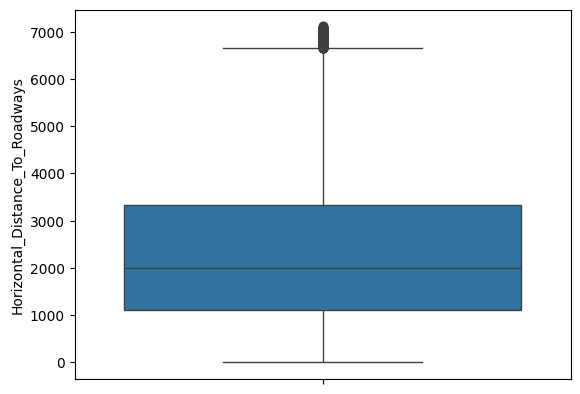

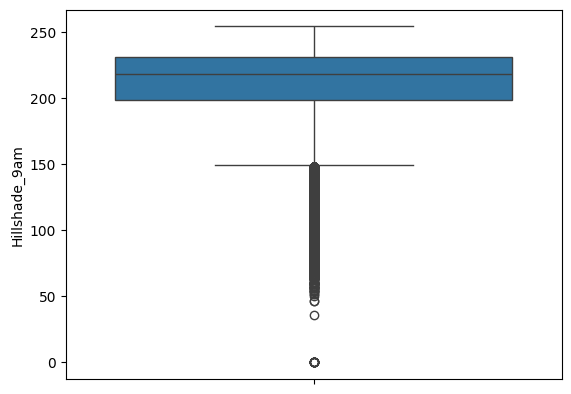

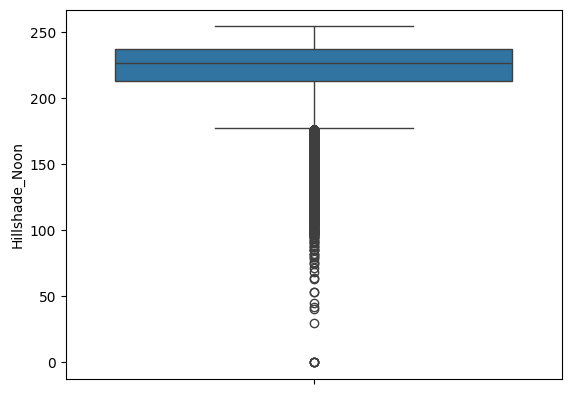

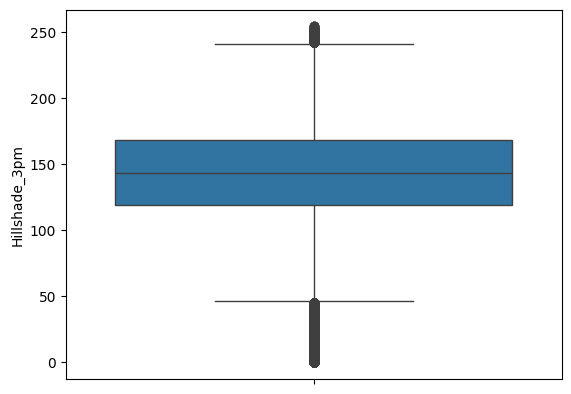

In [ ]:
# make boxplots for the first 10 columns
plt.figure(figsize = (5,5))
for i in range(9):
  sns.boxplot(data = X[X.columns[i]])
  plt.show()

Looking at the boxplots for the continuous variables, we believe that IQR is not a suitable measure for outliers. There are many data points that lie outside the 1.5IQR range. We will consider the outliers in our model.

EDA:

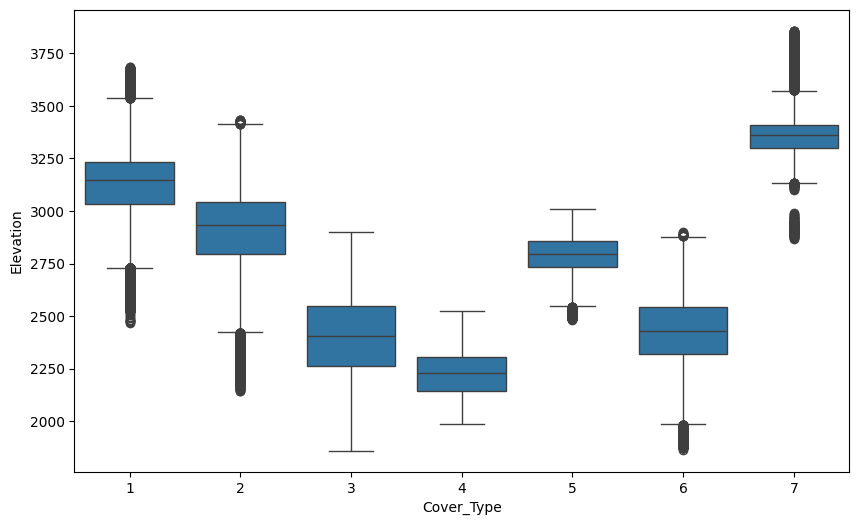

In [ ]:
# plot elevation against y categories
plt.figure(figsize=(10, 6))
# Combine X and y into a single DataFrame for plotting
sns.boxplot(x='Cover_Type', y='Elevation', data=df_combined)
plt.show()

Plotting Elevations against Cover Types, we can observe the range in elevations that are characteristic of different Cover Types. Something to note is that most ranges contain some form of overlap between multiple Cover Types.

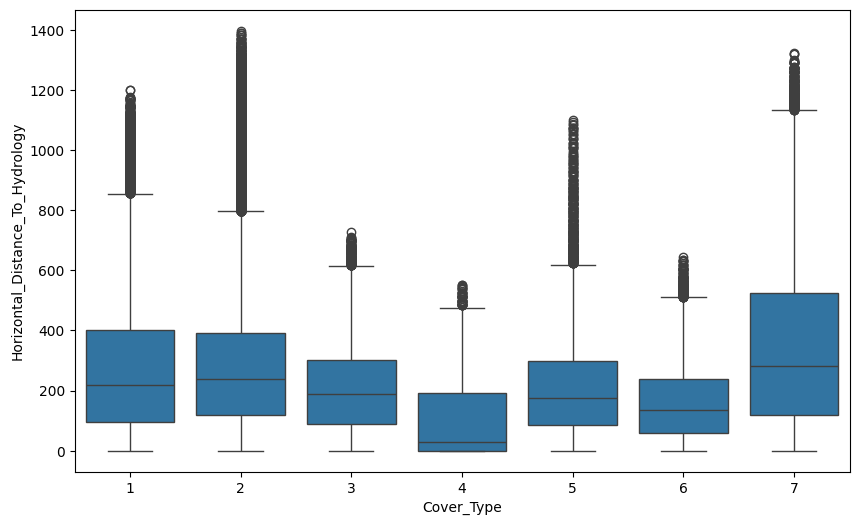

In [ ]:
# plotting horizontal distances to hydrology
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df_combined)
plt.show()

Based on this diagram, horizontal distance to hydrology is not helpful in distinguishing Cover Types.

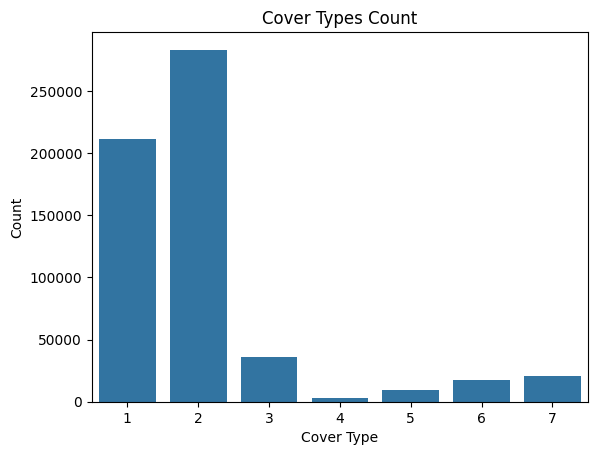

In [ ]:
sns.countplot(x='Cover_Type', data=y)
plt.title('Cover Types Count')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

The most common target is cover type 2, and the least common is cover type 4, which has much less than the rest of the outcomes.

/tmp/ipython-input-1439124274.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([X_rawah["Elevation"], X_neota["Elevation"], X_c_peak["Elevation"], X_poudre["Elevation"]], labels = ["Rawah", "Neota", "C. Peak", "Poudre"])


Text(0.5, 1.0, '')

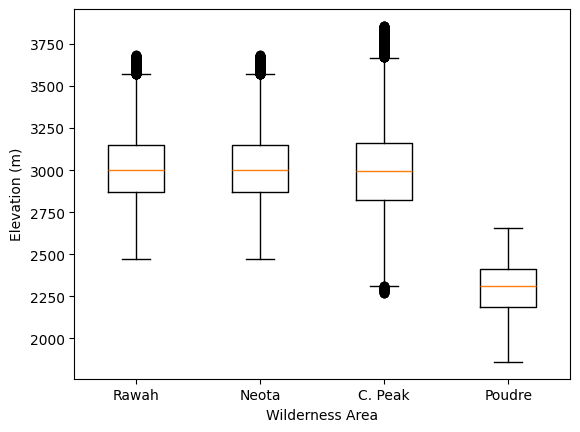

In [ ]:
# Plot 1: See elevant distribution of different wilderness areas
# Rawah: Area 1
# Neota: Area 2
# Comanche Peak: Area 3 (Abbr. as C. Peak)
# Cache la Poudre: Area 4 (Abbr as Poudre)

rawah_idx = X["Wilderness_Area1"] == 1
X_rawah = X[rawah_idx]
y_rawah = y[rawah_idx]

neota_idx = X["Wilderness_Area2"] == 1
X_neota = X[rawah_idx]
y_neota = y[rawah_idx]

c_peak_idx = X["Wilderness_Area3"] == 1
X_c_peak = X[c_peak_idx]
y_c_peak = y[c_peak_idx]

poudre_idx = X["Wilderness_Area4"] == 1
X_poudre = X[poudre_idx]
y_poudre = y[poudre_idx]


fig, ax = plt.subplots()
ax.boxplot([X_rawah["Elevation"], X_neota["Elevation"], X_c_peak["Elevation"], X_poudre["Elevation"]], labels = ["Rawah", "Neota", "C. Peak", "Poudre"])
ax.set_xlabel("Wilderness Area")
ax.set_ylabel("Elevation (m)")
ax.set_title("")

We note that most sites have about the same height, except for Poudre. Correlation for trees at Poudre with water distance?

Text(0.5, 1.0, 'Cache la Poudre')

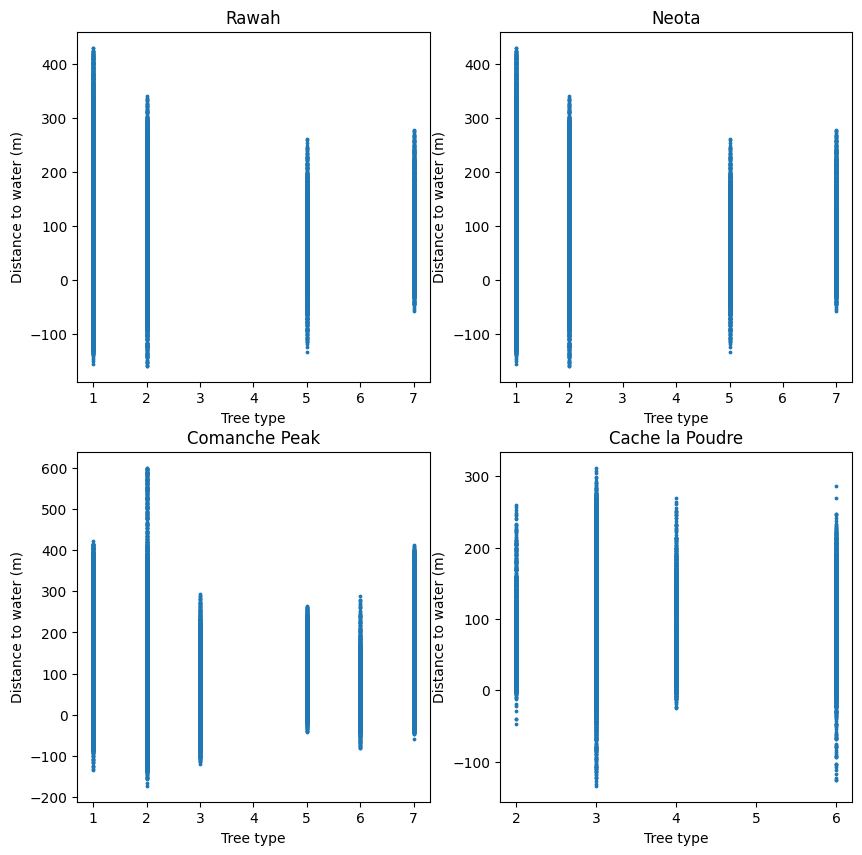

In [ ]:
# Plot 2: Plot the distribution to water for each plant type, per site

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

ax[0, 0].scatter(y_rawah, X_rawah["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 0].set_xlabel("Tree type")
ax[0, 0].set_ylabel("Distance to water (m)")
ax[0, 0].set_title("Rawah")
ax[0, 1].scatter(y_neota, X_neota["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 1].set_xlabel("Tree type")
ax[0, 1].set_ylabel("Distance to water (m)")
ax[0, 1].set_title("Neota")
ax[1, 0].scatter(y_c_peak, X_c_peak["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 0].set_xlabel("Tree type")
ax[1, 0].set_ylabel("Distance to water (m)")
ax[1, 0].set_title("Comanche Peak")
ax[1, 1].scatter(y_poudre, X_poudre["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 1].set_xlabel("Tree type")
ax[1, 1].set_ylabel("Distance to water (m)")
ax[1, 1].set_title("Cache la Poudre")

Trees 3 and 6 are unique to Comanche Peak, and tree 4 is unique to Cache la Poudre.